# K-Means Clustering from Scratch using NumPy
# Author: Dhara Gohel
# Day 3 - AI/ML Learning Journey

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Create Synthetic Dataset

In [15]:
np.random.seed(42)
n_points = 100

# income between 20k–100k, spending between 20–100

In [16]:
income = np.random.randint(20,100,n_points)
spending = np.random.randint(20,100,n_points)
data = np.array(list(zip(income,spending)))

print("=== sample data ===")
print(data[:5])


=== sample data ===
[[71 92]
 [34 91]
 [91 31]
 [80 53]
 [40 52]]


# STEP 2: Initialize K centroids randomly

In [17]:
k = 3
centroids = data[np.random.choice(range(n_points),k,replace=False)]
print("=== initial centroids ===")
print(centroids)

=== initial centroids ===
[[21 22]
 [41 63]
 [41 34]]


# STEP 3: Function to compute distances

In [18]:
def eculidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# STEP 4: K-Means Iteration

In [19]:
for epoch in range(10):
    labels = []
    for point in data:
        distances = [eculidean_distance(point,c) for c in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    new_centroids = np.array([data[labels==k].mean(axis=0) for k in range(k)])

    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids
print("=== final centroids ===")
print(centroids)

=== final centroids ===
[[36.92857143 36.03571429]
 [52.43589744 82.61538462]
 [82.78787879 50.63636364]]


# STEP 5: Show cluster counts

In [20]:
for k in range(k):
    count = np.sum(labels==k)
    print(f"Cluster {k+1}: {count} points")

Cluster 1: 28 points
Cluster 2: 39 points
Cluster 3: 33 points


# STEP 6: Visualize Results


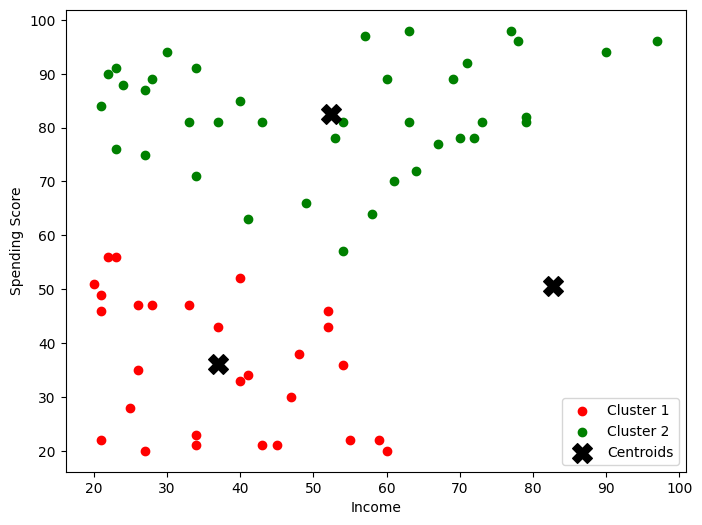

In [21]:
colors = ['r', 'g', 'b']
plt.figure(figsize=(8,6))
for k in range(k):
    cluster_points = data[labels==k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()